**Importing** **the** **packages**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


**Load** **cifar10** **dataset**

In [3]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train_images , test_images = train_images/255.0 , test_images/255.0

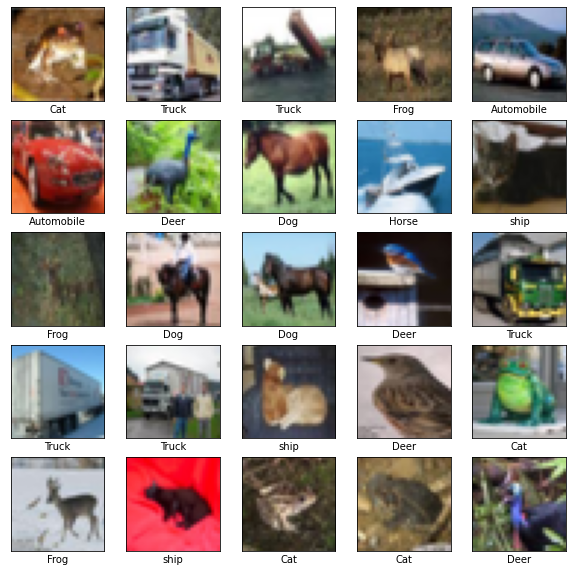

In [5]:
class_name = ['Airplane','Automobile','Deer','ship','Frog','Bird','Cat','Dog','Horse','Truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap= plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

**Creating** **a** **convolutional** **base**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

**Adding** **dense** **layers**

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Compile** **and** **train** **the** **model**

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5348 - accuracy: 0.4405 - val_loss: 1.2319 - val_accuracy: 0.5601
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1824 - accuracy: 0.5807 - val_loss: 1.1295 - val_accuracy: 0.5989
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0372 - accuracy: 0.6348 - val_loss: 1.0285 - val_accuracy: 0.6458
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9416 - accuracy: 0.6705 - val_loss: 0.9726 - val_accuracy: 0.6582
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8693 - accuracy: 0.6931 - val_loss: 0.9334 - val_accuracy: 0.6757
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8126 - accuracy: 0.7127 - val_loss: 0.9103 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7663 - accuracy: 0.7306 - val_loss: 0.8873 -

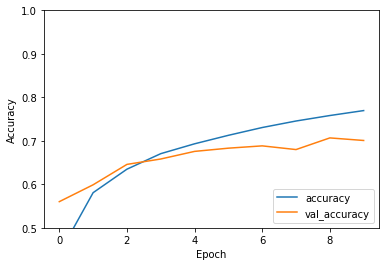

In [8]:
model.compile(optimizer ='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])
history = model.fit(train_images,train_labels,epochs =10,validation_data = (test_images,test_labels))

#Evaluate the model

plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc ='lower right')
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose = 2)

# testing the Accuracy

print(test_acc)